# Gather

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

df= pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [4]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:          
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
384: 827199976799354881
385: 826958653328592898
386: 826848821049180160
387: 826615380357632002
388: 82659879982

689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 782598640137187329
728: 782305867769217024
729: 782021823840026624
730: 78195520344

1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568
1065: 740995100998766593
1066: 740711788199743490
1067: 740699697422163968
1068: 740676976021798912
1069: 740373189193256964


1359: 703382836347330562
1360: 703356393781329922
1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464
1393: 700062718104104960
1394: 700029284593901568
1395: 700002074055016451
1396: 699801817392291840
1397: 699788877217865730
1398: 699779630832685056


1688: 681579835668455424
1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489
1721: 680145970311643136
1722: 680130881361686529
1723: 680115823365742593
1724: 680100725817409536
1725: 680085611152338944
1726: 680070545539371008
1727: 680055455951884288


2016: 672205392827572224
2017: 672169685991993344
2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840
2049: 671511350426865664
2050: 671504605491109889
2051: 671497587707535361
2052: 671488513339211776
2053: 671486386088865792
2054: 671485057807351808
2055: 671390180817915904


2345: 666071193221509120
2346: 666063827256086533
2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149
362.4593595540001
{892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 892177421306343426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891815181378084864: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891689557279858688: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891327558926688256: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891087950875897856: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890971913173991426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890729181411237888: TweepError([{'code': 89, 'message': 'I

In [5]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
page= df2['jpg_url']
first_image_url = page[0]
r = requests.get(first_image_url)

In [7]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
df3 = pd.DataFrame(df_list)

# Assess

In [8]:
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df2.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df3

favorite_count  retweet_count            tweet_id  user_count
0              39467           8853  892420643555336193     3200889
1              33819           6514  892177421306343426     3200889
2              25461           4328  891815181378084864     3200889
3              42908           8964  891689557279858688     3200889
4              41048           9774  891327558926688256     3200889
5              20562           3261  891087950875897856     3200889
6              12041           2158  890971913173991426     3200889
7              56848          16716  890729181411237888     3200889
8              28226           4429  890609185150312448     3200889
9              32467           7711  890240255349198849     3200889
10             31166           7624  890006608113172480     3200889
11             28268           5156  889880896479866881     3200889
12             38818           8538  889665388333682689     3200889
13             27672           4735  889638837579907072     3200889
14             15359           2321  889531135344209921     3200889
15             25652           5637  889278841981685760     3200889
16             29611           4709  888917238123831296     3200889
17             26080           4559  888804989199671297     3200889
18             20290           3732  888554962724278272     3200889
19             22201           3653  888078434458587136     3200889
20             30779           5609  887705289381826560     3200890
21             46959          12082  887517139158093824     3200890
22             69871          18781  887473957103951883     3200890
23             34222          10737  887343217045368832     3200890
24             31061           6167  887101392804085760     3200890
25             35859           8084  886983233522544640     3200890
26             12306           3443  886736880519319552     3200890
27             22798           4610  886680336477933568     3200890
28             21524           3316  886366144734445568     3200890
29               117              4  886267009285017600     3200890
...              ...            ...                 ...         ...
2324             459            339  666411507551481857     3201017
2325             113             44  666407126856765440     3201018
2326             172             92  666396247373291520     3201018
2327             194            100  666373753744588802     3201018
2328             804            595  666362758909284353     3201018
2329             229             77  666353288456101888     3201018
2330             307            146  666345417576210432     3201018
2331             204             96  666337882303524864     3201018
2332             522            368  666293911632134144     3201018
2333             152             71  666287406224695296     3201018
2334             184             82  666273097616637952     3201018
2335             108             37  666268910803644416     3201018
2336           14765           6871  666104133288665088     3201018
2337              81             16  666102155909144576     3201018
2338             164             73  666099513787052032     3201018
2339             169             79  666094000022159362     3201018
2340             121             47  666082916733198337     3201018
2341             335            174  666073100786774016     3201018
2342             154             67  666071193221509120     3201018
2343             496            232  666063827256086533     3201018
2344             115             61  666058600524156928     3201018
2345             304            146  666057090499244032     3201018
2346             448            261  666055525042405380     3201018
2347            1253            879  666051853826850816     3201018
2348             136             60  666050758794694657     3201018
2349             111             41  666049248165822465     3201018
2350             311            147  666044226329800704     32

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [14]:
df2[df2.p1_conf >= 1]

tweet_id                                          jpg_url  \
106  667866724293877760  https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   

     img_num             p1  p1_conf  p1_dog          p2       p2_conf  \
106        1  jigsaw_puzzle      1.0   False  prayer_rug  1.011300e-08   

     p2_dog       p3       p3_conf  p3_dog  
106   False  doormat  1.740170e-10   False

In [15]:
all_columns = pd.Series(list(df) + list(df2))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [16]:
sum(df.duplicated())

0

In [17]:
sum(df2.duplicated())

0

In [18]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [19]:
df2.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [20]:
df3.describe()

favorite_count  retweet_count      tweet_id    user_count
count     2354.000000    2354.000000  2.354000e+03  2.354000e+03
mean      8080.968564    3164.797366  7.426978e+17  3.200942e+06
std      11814.771334    5284.770364  6.852812e+16  4.457302e+01
min          0.000000       0.000000  6.660209e+17  3.200799e+06
25%       1415.000000     624.500000  6.783975e+17  3.200898e+06
50%       3603.500000    1473.500000  7.194596e+17  3.200945e+06
75%      10122.250000    3652.000000  7.993058e+17  3.200953e+06
max     132810.000000   79515.000000  8.924206e+17  3.201018e+06

In [21]:
df[df.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [22]:
df[df['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [23]:
df2[df2['jpg_url'].isnull()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

## Quality

##### `df` table
- in_reply_to_status_id and in_reply_to_user_id are int not float.
- timestamp is a datetime not a string.
- Replace name for rows that have a given name of 'a' with 'an'.
- set all rating_denominator value by 10.
- For tweet_id 666411507551481857 rating_numerator is 12 instead of 2.
- Capitalize the first character name column.
- Nulls represented as None in name column.
- Drop unneeded columns for retweets.

##### `df2` table
- For tweet_id 667866724293877760 p1_dog is Ture instead of False.
- Add breed column.
- Drop unneeded columns.

## Tidiness
- One variable in four columns in `df` table (dog_stage) includes (doggo, floofer, pupper, puppo).
- Merge `df` and `df3`, joining on tweet_id, as `df3` is not representing an observational unit.

# Clean

In [24]:
df_clean = df.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

## Quality
### DataTypes
#### df table
##### Define
Convert the in_reply_to_status_id, in_reply_to_user_id columns' data type from float to int using `astype`
Convert timestamp to datetime data type.

##### Code

In [25]:
# to int
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.fillna(0.0).astype(int)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.fillna(0.0).astype(int)

# To datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

##### Test

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

## Quality
### Capitalization
#### df table
##### Define
Capitalize the first character name column

##### Code

In [27]:
df_clean.name = df_clean.name.str.capitalize()

##### Test

In [28]:
df_clean.name.value_counts()

None        745
A            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
The           8
An            7
Buddy         7
Toby          7
Daisy         7
Bailey        7
Dave          6
Bella         6
Koda          6
Leo           6
Stanley       6
Jack          6
Jax           6
Rusty         6
Oscar         6
Scout         6
Milo          6
Very          5
           ... 
Tuco          1
Tango         1
Zeus          1
Rodney        1
Strudel       1
Fletcher      1
Karll         1
Alf           1
Billl         1
Orion         1
Jiminus       1
Chloe         1
Suki          1
Nico          1
Ito           1
Brandy        1
Monkey        1
Zara          1
Livvie        1
Cedrick       1
Hazel         1
Skittles      1
Jo            1
Jersey        1
Colin         1
Pupcasso      1
Sailor        1
Kenzie        1
Nugget        1
Duchess       1
Name: name, Length: 957,

## Quality
### Null values
#### df table
##### Define

Nulls represented as None in name column

##### Code

In [29]:
df_clean.name = df_clean.name.replace('None', np.nan)

##### Test

In [30]:
#null values in name column appear as null
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

## Tidiness
#### *df table*
One variable in four columns in df table (dog_stage) includes (doggo, floofer, pupper, puppo)

#### Define
Melt the doggo, floofer, pupper and puppo columns to *dog_stage* columns

#### Code

In [31]:
df_clean.doggo = df_clean.doggo.replace('None', np.nan)
df_clean.floofer = df_clean.floofer.replace('None', np.nan)
df_clean.pupper = df_clean.pupper.replace('None', np.nan)
df_clean.puppo = df_clean.puppo.replace('None', np.nan)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](

In [32]:
df_clean['dog_stage'] = df_clean[df_clean.columns[13:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
df_clean.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [33]:
df_clean.dog_stage = df_clean.dog_stage.replace('', np.nan)
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                      0                    0   
1     892177421306343426                      0                    0   
2     891815181378084864                      0                    0   
3     891689557279858688                      0                    0   
4     891327558926688256                      0                    0   
5     891087950875897856                      0                    0   
6     890971913173991426                      0                    0   
7     890729181411237888                      0                    0   
8     890609185150312448                      0                    0   
9     890240255349198849                      0                    0   
10    890006608113172480                      0                    0   
11    889880896479866881                      0                    0   
12    889665388333682689                      0                    0   
13    889638837579907072                      0                    0   
14    889531135344209921                      0                    0   
15    889278841981685760                      0                    0   
16    888917238123831296                      0                    0   
17    888804989199671297                      0                    0   
18    888554962724278272                      0                    0   
19    888202515573088257                      0                    0   
20    888078434458587136                      0                    0   
21    887705289381826560                      0                    0   
22    887517139158093824                      0                    0   
23    887473957103951883                      0                    0   
24    887343217045368832                      0                    0   
25    887101392804085760                      0                    0   
26    886983233522544640                      0                    0   
27    886736880519319552                      0                    0   
28    886680336477933568                      0                    0   
29    886366144734445568                      0                    0   
...                  ...                    ...                  ...   
2326  666411507551481857                      0                    0   
2327  666407126856765440                      0                    0   
2328  666396247373291520                      0                    0   
2329  666373753744588802                      0                    0   
2330  666362758909284353                      0                    0   
2331  666353288456101888                      0                    0   
2332  666345417576210432                      0                    0   
2333  666337882303524864                      0                    0   
2334  666293911632134144                      0                    0   
2335  666287406224695296                      0                    0   
2336  666273097616637952                      0                    0   
2337  666268910803644416                      0                    0   
2338  666104133288665088                      0                    0   
2339  666102155909144576                      0                    0   
2340  666099513787052032                      0                    0   
2341  666094000022159362                      0                    0   
2342  666082916733198337                      0                    0   
2343  666073100786774016                      0                    0   
2344  666071193221509120                      0                    0   
2345  666063827256086533                      0                    0   
2346  666058600524156928                      0                    0   
2347  666057090499244032                      0                    0   
2348  666055525042405380                      0                    0   
2349  666051853826850816                      0         

In [34]:
df_clean.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Test

In [35]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                      0                    0   
1     892177421306343426                      0                    0   
2     891815181378084864                      0                    0   
3     891689557279858688                      0                    0   
4     891327558926688256                      0                    0   
5     891087950875897856                      0                    0   
6     890971913173991426                      0                    0   
7     890729181411237888                      0                    0   
8     890609185150312448                      0                    0   
9     890240255349198849                      0                    0   
10    890006608113172480                      0                    0   
11    889880896479866881                      0                    0   
12    889665388333682689                      0                    0   
13    889638837579907072                      0                    0   
14    889531135344209921                      0                    0   
15    889278841981685760                      0                    0   
16    888917238123831296                      0                    0   
17    888804989199671297                      0                    0   
18    888554962724278272                      0                    0   
19    888202515573088257                      0                    0   
20    888078434458587136                      0                    0   
21    887705289381826560                      0                    0   
22    887517139158093824                      0                    0   
23    887473957103951883                      0                    0   
24    887343217045368832                      0                    0   
25    887101392804085760                      0                    0   
26    886983233522544640                      0                    0   
27    886736880519319552                      0                    0   
28    886680336477933568                      0                    0   
29    886366144734445568                      0                    0   
...                  ...                    ...                  ...   
2326  666411507551481857                      0                    0   
2327  666407126856765440                      0                    0   
2328  666396247373291520                      0                    0   
2329  666373753744588802                      0                    0   
2330  666362758909284353                      0                    0   
2331  666353288456101888                      0                    0   
2332  666345417576210432                      0                    0   
2333  666337882303524864                      0                    0   
2334  666293911632134144                      0                    0   
2335  666287406224695296                      0                    0   
2336  666273097616637952                      0                    0   
2337  666268910803644416                      0                    0   
2338  666104133288665088                      0                    0   
2339  666102155909144576                      0                    0   
2340  666099513787052032                      0                    0   
2341  666094000022159362                      0                    0   
2342  666082916733198337                      0                    0   
2343  666073100786774016                      0                    0   
2344  666071193221509120                      0                    0   
2345  666063827256086533                      0                    0   
2346  666058600524156928                      0                    0   
2347  666057090499244032                      0                    0   
2348  666055525042405380                      0                    0   
2349  666051853826850816                      0         

## Quality
### Incorrect data
#### df table
##### Define
Replace name for rows in the `df` table that have a given name of 'a' with 'an'.

#### Code

In [36]:
df_clean.name = df_clean.name.replace('A', 'An')

#### Test

In [37]:
df_clean[df_clean.name == 'A']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

### Quality
##### Set all values of rating_denominator = 10
#### df table

#### Define
These ratings almost always have a denominator of 10.

#### Code

In [38]:
df_clean.rating_denominator = df_clean.rating_denominator = '10'

#### Test

In [39]:
df_clean[df_clean.rating_denominator != '10']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

### Quality
##### Drop unneeded columns for retweets
#### df table

#### Define
These three columns `retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp` are not needed in our dataset. 

#### Code

In [40]:
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [41]:
df_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                      0                    0   
1  892177421306343426                      0                    0   
2  891815181378084864                      0                    0   
3  891689557279858688                      0                    0   
4  891327558926688256                      0                    0   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

  rating_denominator      name dog_stage  
0                 10   Phineas       NaN  
1                 10     Tilly       NaN  
2                 10    Archie       NaN  
3                 10     Darla       NaN  
4                 10  Franklin       NaN

## Quality
### Incorrect Data
#### *df2 table*
##### Define
For tweet_id 667866724293877760 p1_dog column is Ture instead of False

##### Code

In [42]:
df2_clean.p1_dog[df2_clean.tweet_id == 667866724293877760] = 'True'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Test

In [43]:
df2_clean[df2_clean.tweet_id == 667866724293877760]

tweet_id                                          jpg_url  \
106  667866724293877760  https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   

     img_num             p1  p1_conf p1_dog          p2       p2_conf  p2_dog  \
106        1  jigsaw_puzzle      1.0   True  prayer_rug  1.011300e-08   False   

          p3       p3_conf  p3_dog  
106  doormat  1.740170e-10   False

## Quality
### Add breed column
#### *df2 table*

##### Define
From the `p1_conf`,`p2_conf` and `p3_conf` columns we can get the breed for each dog.

##### Code

In [44]:
df2_clean['breed'] = df2_clean.apply(lambda r: 
                   r['p1'] if r['p1_conf'] > r['p2_conf'] and r['p1_conf'] > r['p3_conf'] else (
                       r['p2'] if r['p2_conf'] > r['p1_conf'] and r['p2_conf'] > r['p3_conf'] else r['p3']), 
                   axis=1)

##### Test

In [45]:
df2_clean.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074   True              collie   
1        1                 redbone  0.506826   True  miniature_pinscher   
2        1         German_shepherd  0.596461   True            malinois   
3        1     Rhodesian_ridgeback  0.408143   True             redbone   
4        1      miniature_pinscher  0.560311   True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137   True    English_springer   
6        1              box_turtle  0.933012  False          mud_turtle   
7        1                    chow  0.692517   True     Tibetan_mastiff   
8        1           shopping_cart  0.962465  False     shopping_basket   
9        1        miniature_poodle  0.201493   True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  \
0  0.156665    True            Shetland_sheepdog  0.061428    True   
1  0.074192    True          Rhodesian_ridgeback  0.072010    True   
2  0.138584    True                   bloodhound  0.116197    True   
3  0.360687    True           miniature_pinscher  0.222752    True   
4  0.243682    True                     Doberman  0.154629    True   
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True   
6  0.045885   False                     terrapin  0.017885   False   
7  0.058279    True                     fur_coat  0.054449   False   
8  0.014594   False             golden_retriever  0.007959    True   
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True   

                    breed  
0  Welsh_springer_spaniel  
1                 redbone  
2         German_shepherd  
3     Rhodesian_ridgeback  
4      miniature_pinscher  
5    Bernese_mountain_dog  
6              box_turtle  
7                    chow  
8           shopping_cart  
9        miniature_poodle

## Quality
### Drop unneeded columns
#### *df2 table*

##### Define
Drop useless colums like `p1_dog`,`p2_dog` and `p3_dog`.

##### Code

In [46]:
df2_clean = df2_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

##### Test

In [47]:
df2_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf                  p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074              collie  0.156665   
1        1                 redbone  0.506826  miniature_pinscher  0.074192   
2        1         German_shepherd  0.596461            malinois  0.138584   
3        1     Rhodesian_ridgeback  0.408143             redbone  0.360687   
4        1      miniature_pinscher  0.560311          Rottweiler  0.243682   

                    p3   p3_conf                   breed  
0    Shetland_sheepdog  0.061428  Welsh_springer_spaniel  
1  Rhodesian_ridgeback  0.072010                 redbone  
2           bloodhound  0.116197         German_shepherd  
3   miniature_pinscher  0.222752     Rhodesian_ridgeback  
4             Doberman  0.154629      miniature_pinscher

### Tidiness
#### Merge `df` and `df3`

##### Define
Merge `df` and `df3`, joining on tweet_id, as `df3` is not representing an observational unit.

#### Code

In [48]:
df_clean = pd.merge(df_clean, df3_clean, on=['tweet_id'], how='left')

#### Test

In [49]:
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    2356 non-null int64
in_reply_to_user_id      2356 non-null int64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null object
name                     1611 non-null object
dog_stage                380 non-null object
favorite_count           2354 non-null float64
retweet_count            2354 non-null float64
user_count               2354 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 276.1+ KB


## Quality
### DataTypes
#### df table
##### Define
Convert the `favorite_count`, `retweet_count` and `user_count` columns' data type from float to int using `astype`

##### Code

In [50]:
# to int
df_clean.favorite_count = df_clean.favorite_count.fillna(0.0).astype(int)
df_clean.retweet_count = df_clean.retweet_count.fillna(0.0).astype(int)
df_clean.user_count = df_clean.user_count.fillna(0.0).astype(int)

##### Test

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    2356 non-null int64
in_reply_to_user_id      2356 non-null int64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null object
name                     1611 non-null object
dog_stage                380 non-null object
favorite_count           2356 non-null int64
retweet_count            2356 non-null int64
user_count               2356 non-null int64
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 276.1+ KB


# Storing

In [52]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [53]:
df2_clean.to_csv('twitter_archive_master2.csv', index=False)

# Analysis and Visualization

In [54]:
doggo_counts = df_clean.dog_stage.value_counts()['doggo']
doggo_counts

83

In [55]:
floofer_counts = df_clean.dog_stage.value_counts()['floofer']
floofer_counts

9

In [56]:
pupper_counts = df_clean.dog_stage.value_counts()['pupper']
pupper_counts

245

In [57]:
puppo_counts = df_clean.dog_stage.value_counts()['puppo']
puppo_counts

29

In [58]:
#number of the dog_stage we have
stages_count = df_clean['dog_stage'].count()
stages_count

380

In [59]:
#percentage of doggo stage
doggo_counts / stages_count

0.21842105263157896

In [60]:
#percentage of floofer stage
floofer_counts / stages_count

0.02368421052631579

In [61]:
#percentage of pupper stage
pupper_counts / stages_count

0.64473684210526316

In [62]:
#percentage of puppo stage
puppo_counts / stages_count

0.076315789473684212

Text(0,0.5,'Counts')

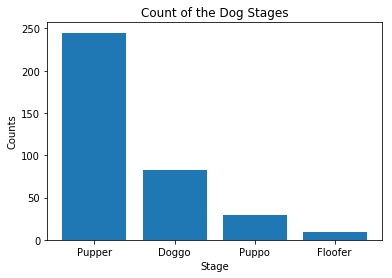

In [63]:
locations = [1, 2, 3, 4]
heights = [pupper_counts, doggo_counts, puppo_counts, floofer_counts]
labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
plt.bar(locations, heights, tick_label=labels)
plt.title('Count of the Dog Stages')
plt.xlabel('Stage')
plt.ylabel('Counts')

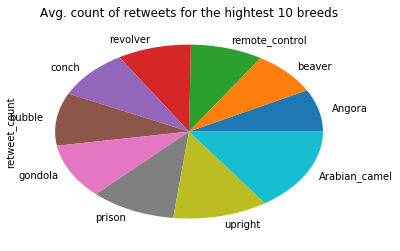

In [64]:
#to access the highest 10 breeds in terms of their average retweet_count:
dfmerged= pd.merge(df_clean, df2_clean, on= 'tweet_id')
breed_list= dfmerged.groupby(['breed']).retweet_count.mean().sort_values(ascending=False)[9::-1]
breed_list.plot(kind= 'pie', title= 'Avg. count of retweets for the hightest 10 breeds')

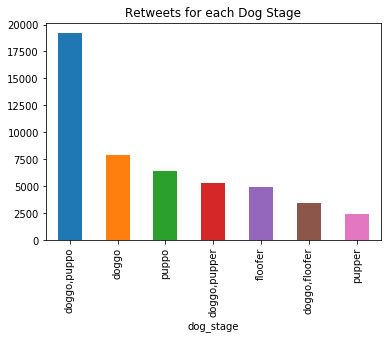

In [65]:
#to access the dog_stages in terms of their average retweet_count:
stage_retweet_counts= dfmerged.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)
stage_retweet_counts.plot(kind= 'bar', title= 'Retweets for each Dog Stage')